## now on France


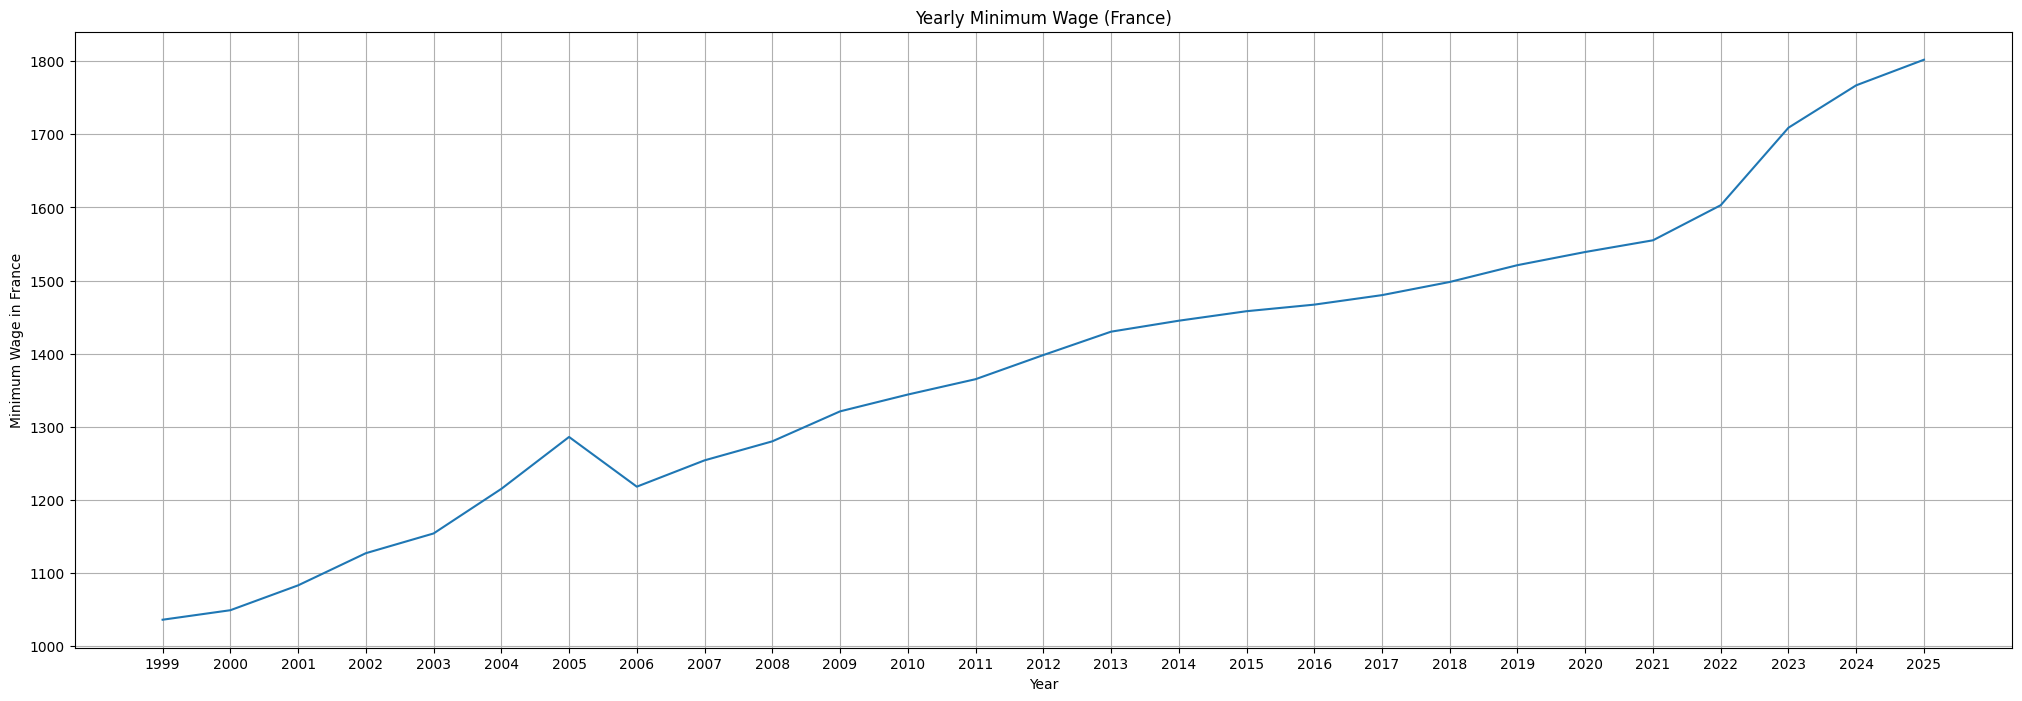

In [2]:
import pandas as pd

minimum_wage = pd.read_csv('earn_mw_cur_linear_2_0.csv')
inflation = pd.read_csv('tec00118_linear_2_0.csv')

import matplotlib.pylab as plt
france_minimum_wage_salaries = minimum_wage[(minimum_wage.geo == 'FR') & (minimum_wage.Currency == 'National currency') & (minimum_wage.TIME_PERIOD.str.endswith('S1'))][['TIME_PERIOD', 'OBS_VALUE']]

france_minimum_wage_salaries.TIME_PERIOD = france_minimum_wage_salaries.TIME_PERIOD.replace(r"-S1$", "", regex=True)
france_minimum_wage_salaries.TIME_PERIOD = france_minimum_wage_salaries.TIME_PERIOD.astype(int)
plt.figure(figsize=(25, 8))
plt.plot(france_minimum_wage_salaries.TIME_PERIOD, france_minimum_wage_salaries.OBS_VALUE)
plt.xlabel("Year")
plt.ylabel("Minimum Wage in France")
plt.title("Yearly Minimum Wage (France)")
plt.xticks(france_minimum_wage_salaries.TIME_PERIOD)
plt.grid()

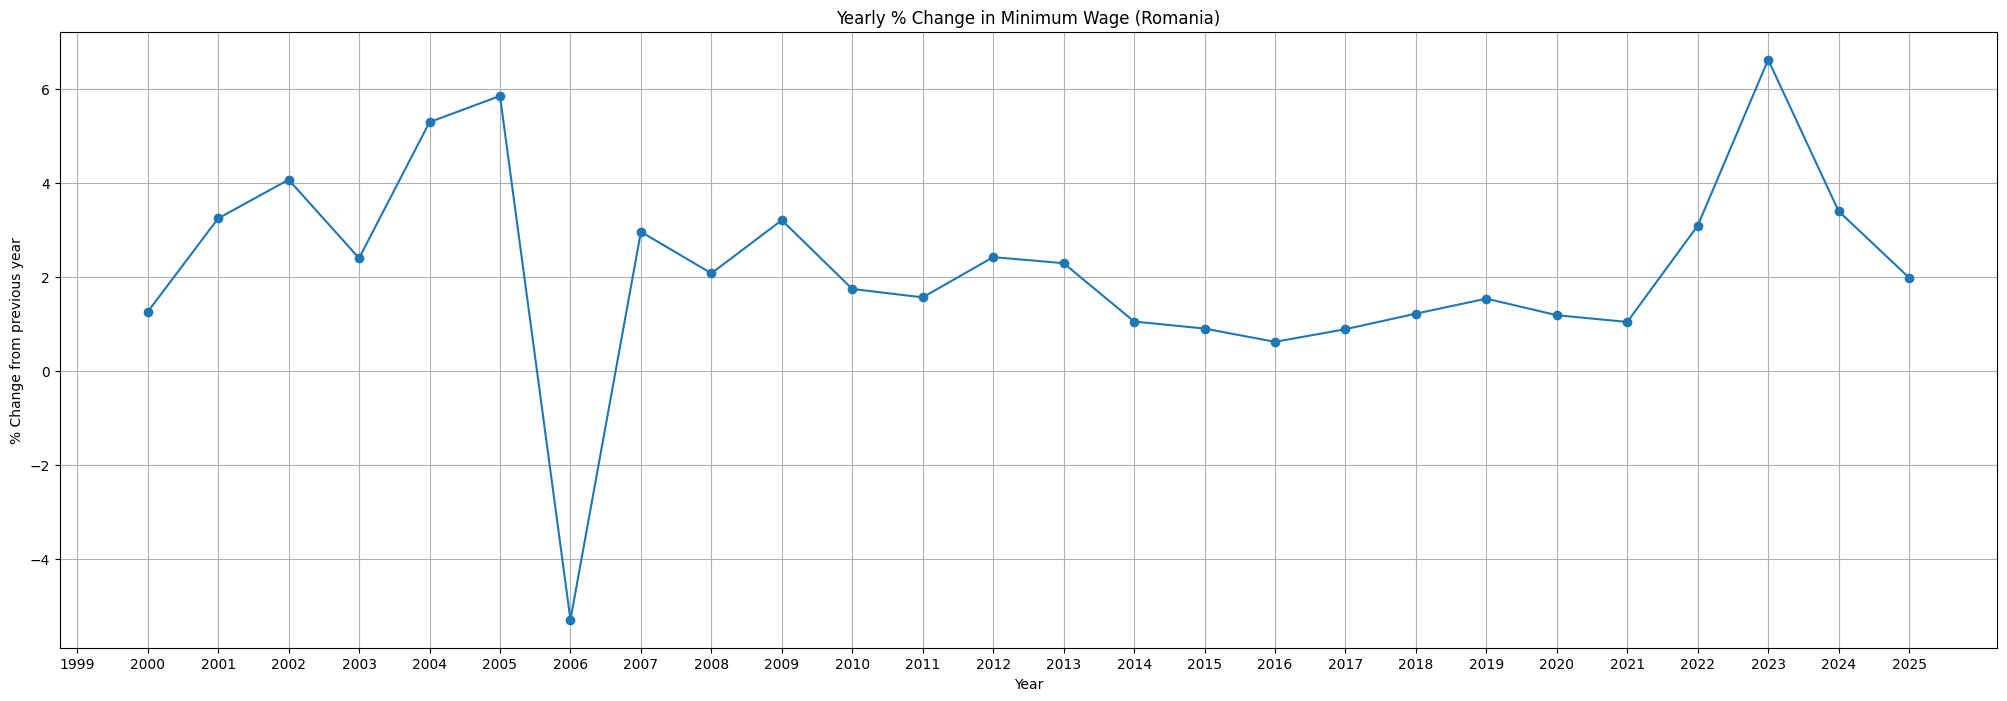

In [3]:
france_minimum_wage_salaries["pct_change"] = france_minimum_wage_salaries.OBS_VALUE.pct_change() * 100
plt.figure(figsize=(25, 8))
plt.plot(
    france_minimum_wage_salaries["TIME_PERIOD"],
    france_minimum_wage_salaries["pct_change"],
    marker="o"
)
plt.xlabel("Year")
plt.ylabel("% Change from previous year")
plt.title("Yearly % Change in Minimum Wage (Romania)")
plt.xticks(france_minimum_wage_salaries.TIME_PERIOD)
plt.grid()